## Cours introductif à la data science


----

# How to use a notebook

Two types of cells: code (to be executed) or text (for your notes)

More types with JupyterLab

In [13]:
# Comments here
print('Hello world')
1+3

Hello world


4

More comments may be put in a text cell such as this one.

---



---



Some useful keyboard shortcuts: see the list with **Ctrl + M + H**

&nbsp;

Google Colab helps you to code:
- Auto-completion via Tab key and/or lists of variables
- Code may even be AI-generated --- we will provide examples in due time
- AI assistant (Gemini) readily available -- both a blessing and a curse

# Part 1: Load, show, describe a data set

Data set available at: https://www.dropbox.com/scl/fi/cafdvvkppxult940cf1zb/MoviesRatings1.csv?rlkey=pg4xagx00xspi832fakno0jla&dl=1

Let's load the raw file with a text editor.
Next, with Python:

In [14]:
# The pandas library is a collection of Python tools for data analysis
import pandas as pd

# Function read_csv reads a CSV (comma-separated values) text file
df_movie = pd.read_csv("https://www.dropbox.com/scl/fi/cafdvvkppxult940cf1zb/MoviesRatings1.csv?rlkey=pg4xagx00xspi832fakno0jla&dl=1")

In [15]:
# Display an excerpt of the data set, as a dataframe
df_movie

,Title,Year,IMDb,Rotten.Tomatoes,Runtime
0,Inception,2010,8.8,0.87,148.0
1,The Matrix,1999,8.7,0.87,136.0
2,Avengers: Infinity War,2018,8.5,0.84,149.0
3,Back to the Future,1985,8.5,0.96,116.0
4,"The Good, the Bad and the Ugly",1966,8.8,0.97,161.0
...,...,...,...,...,...
5151,George of the Jungle 2,2003,3.3,0.17,87.0
5152,That Darn Cat,1997,4.7,0.13,116.0
5153,Kazaam,1996,3.0,0.06,93.0
5154,Meet the Deedles,1998,4.1,0.07,93.0


<font color='blue'>Questions:
* How many movies does the data set contain?
* What do we see? (Which variables, what ranges, units, etc.?)
</font>

### Concepts of variable, observations, and values

![](https://d33wubrfki0l68.cloudfront.net/6f1ddb544fc5c69a2478e444ab8112fb0eea23f8/91adc/images/tidy-1.png)


Note: variable (in statistics) = feature (in machine learning), choose your preferred word!

**Description of the movie data**

In the US, there are two main websites/applications for rating movies: IMDb (https://www.imdb.com/) and Rotten Tomatoes (https://www.rottentomatoes.com/about). The French equivalent is Allociné.

Variables:
- Title (of the movie)
- Year (of first release)
- IMDb (= average rating, on a 1-10 scale, by IMDb users)
- Rotten.Tomatoes (= share of positive evaluations among evaluations of this movie by professional critics, aka 'Tomatometer')
- Runtime (of the movie, in minutes)

The target variables are IMDb and Rotten.Tomatoes. We may want to relate them, for instance.

### Describe / summarize data

In [16]:
# df_movie is an object with type dataframe
# Such objects enjoy a method 'describe()'



<font color='blue'>Question: do IMDb and Rotten.Tomatoes ratings seem consistent?</font>

## Exercise 1: Ski data set

We consider some French ski resorts and report the following variables for each of them:
- **Station**: the name of the resort
- **Price**: the price of a weekly ski pass
- **Mountain**: the mountain area where it is located
- **AltitudeDown**: the altitude of the village
- **AltitudeTop**: the altitude of the top of the resort
- **Slopes**: the number of slopes
- **Lifts**: the number of lifts

The data set is accessible through this link: https://www.dropbox.com/scl/fi/pgfw6h0x9pxbr7c01jg6k/SkiData-FRG.csv?rlkey=yupn270yn4s4xnigoeasv084e&dl=1

&nbsp;

Questions
1. Load the data set: how many resorts are considered?
2. Provide descriptive statistics on the variables:
    - What is the median top altitude?
    - What variables are missing in the table with descriptive statistics, and why?
    - Provide any other interesting comment.

In [17]:
data = pd.read_csv("./sample_data/SkiData-FRG.csv")
data.describe()



,Price,AltitudeDown,AltitudeTop,Slopes,Lifts
count,204.000000,204.000000,204.000000,204.000000,204.000000
mean,151.431373,1316.392157,2159.534314,37.789216,18.612745
std,60.590609,292.990935,583.323402,34.746934,18.007990
min,40.000000,600.000000,970.000000,1.000000,1.000000
25%,101.500000,1100.000000,1708.500000,14.000000,7.000000
50%,150.000000,1350.000000,2100.000000,27.500000,12.000000
75%,192.000000,1500.000000,2550.000000,49.250000,23.000000
max,285.000000,2300.000000,3600.000000,235.000000,108.000000


# Part 2: Selecting, visualizing, creating a quantitative variable with *seaborn*

We go back to the movie data.

We want to explore more the average ratings  on the one hand (for both IMDb and Rottent Tomatoes), and the runtimes, on the other hand.

In [18]:
# Extracting one variable: using brackets
df_movie['IMDb']

0       8.8
1       8.7
2       8.5
3       8.5
4       8.8
       ... 
5151    3.3
5152    4.7
5153    3.0
5154    4.1
5155    5.3
Name: IMDb, Length: 5156, dtype: float64

At this stage, it is time to remind you about auto-completion:
- Press Tab to complete text being typed
- Press tab to complete a lists of variables (generated depending on the context)

In [19]:
# df_movie['IMDb'] is an object of type 'series' (i.e., a sort of one-dimensional data frame)
# It can also be manipulated as such, e.g.:
df_movie['IMDb'].describe()

count    5156.000000
mean        6.375233
std         1.002417
min         1.600000
25%         5.700000
50%         6.500000
75%         7.100000
max         9.000000
Name: IMDb, dtype: float64

To provide graphical representation of quantitative variables, we will use the *seaborn* library

In [20]:
import seaborn as sns

### Visualizing a quantitative variable via histograms

<Axes: xlabel='IMDb', ylabel='Count'>

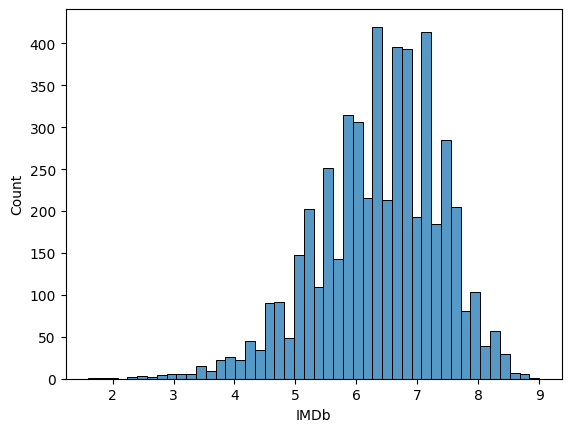

In [21]:
sns.histplot(data=df_movie, x = 'IMDb')

# Or equivalently,  sns.histplot(data=df_movie['IMDb'], x = 'IMDb')
# Or                sns.histplot(x= df_movie['IMDb'])

<Axes: xlabel='IMDb', ylabel='Probability'>

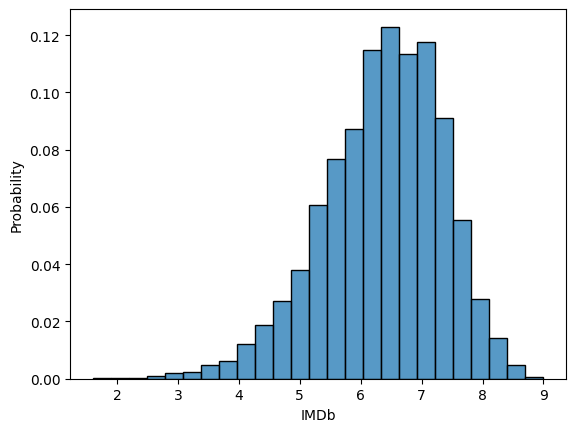

In [22]:
# To show probabilities and set the number of bins:
sns.histplot(data=df_movie['IMDb'], bins=25, stat='probability') # type: ignore

<Axes: xlabel='Rotten.Tomatoes', ylabel='Probability'>

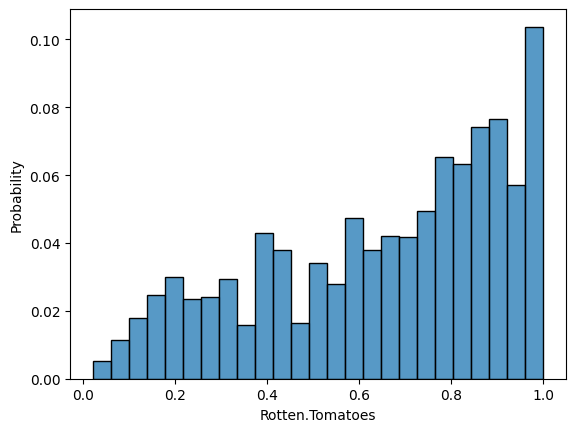

In [23]:
# Same for Rotten.Tomatoes:
sns.histplot(data=df_movie['Rotten.Tomatoes'], bins=25, stat='probability') # type: ignore

<font color='blue'>Give us your thoughts (once again, but with a fresh eye) about consistency...</font>

Conclusion: you learn a lot by visualizing data (compared to mere numerical statistics)!

### Visualizing a quantitative variable via boxplots

Boxplots provide information on the median and the quartiles of a variable:

* The **median** is represented with a bar
* 50 % of the observations are **in** the box
* 25 % of the observations are **above** the box (above Q3 = 75th percentile)
* 25 % of the observations are **below** the box (below Q1 = 25th percentile)
* **Extreme values** (outliers) are above/below the whiskers

<img src="https://miro.medium.com/max/9000/1*2c21SkzJMf3frPXPAR_gZA.png" alt="drawing" width="600"/>

<Axes: xlabel='IMDb'>

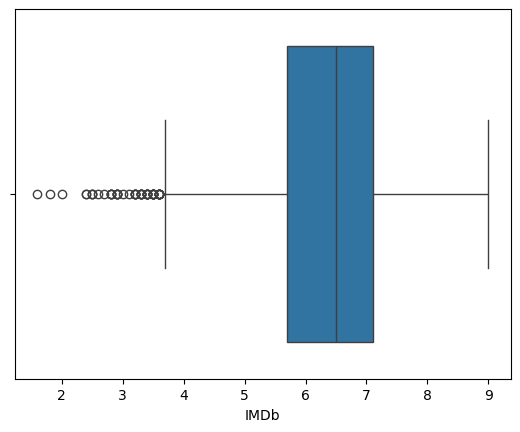

In [24]:
sns.boxplot(data = df_movie,x = 'IMDb')

In [ ]:
# Same, for Rotten.Tomatoes:
sns.boxplot(data=df_movie, x= 'Rotten.Tomatoes')

To make the comparison easier, show the ratings of IMDb and Rotten.Tomatoes next to each other:

In [ ]:
# This selects only the required columns from the dataset df_movie:
df_movie[['IMDb','Rotten.Tomatoes']]

To make the comparison easier, rescale ratings on IMDb and combine both plots in one:

In [ ]:
sns.boxplot(data=df_movie[['IMDb','Rotten.Tomatoes']])

There is a clear problem of *scaling*. We address it by rescaling the ratings for IMDb:

In [ ]:
# First we create a new variable for the rescaled ratings of IMDb:
df_movie['IMDb_rescaled']=(df_movie['IMDb']-1)/9

We now plot the rating from IMDb (rescaled) and Rotten.Tomatoes on the same boxplot:

In [ ]:
# On df_movie[['IMDb_rescaled','Rotten.Tomatoes']], we can use the same functions
# as on the entire dataset. For instance:
df_movie[['IMDb_rescaled','Rotten.Tomatoes']].describe()

In [ ]:
# We are now ready to create the new boxplot with both ratings:
sns.boxplot(df_movie[['IMDb_rescaled','Rotten.Tomatoes']])

<font color='blue'>Based on the descriptive statistics and on the picture, can you comment again on the consistency of these two ratings?</font>

## Exercise 2: Ski data set, continued

Define the elevation gain as the difference between altitudes at the top and at the village.
- Analyze the elevation gain variable, both numerically and graphically.
- Ask the AI tool from Google Colab (Gemini) which station has the smallest elevation gain.
- Try to produce box plots and histograms of the elevation gain using boxplots (without Gemini).

# Part 3: Visualizing a pair of quantitative variables

<Axes: xlabel='ElevationGain', ylabel='Count'>

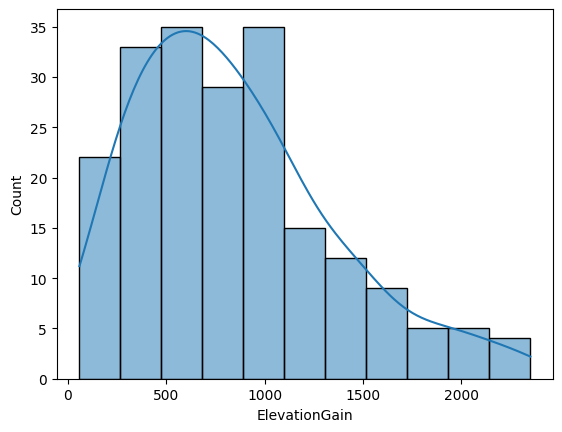

In [47]:
# Fresh restart
import pandas as pd
import seaborn as sns
df_ski = pd.read_csv("https://www.dropbox.com/scl/fi/pgfw6h0x9pxbr7c01jg6k/SkiData-FRG.csv?rlkey=yupn270yn4s4xnigoeasv084e&dl=1")
df_ski['ElevationGain'] = df_ski['AltitudeTop'] - df_ski['AltitudeDown']

sns.histplot(df_ski['ElevationGain'],  kde=True) # pyright: ignore[reportArgumentType]

We now explore the relation between pairs of variables via a *scatter plot*.

For instance, we can observe how the variable **ElevationGain** influences the **Price** as follows:

<Axes: xlabel='ElevationGain', ylabel='Price'>

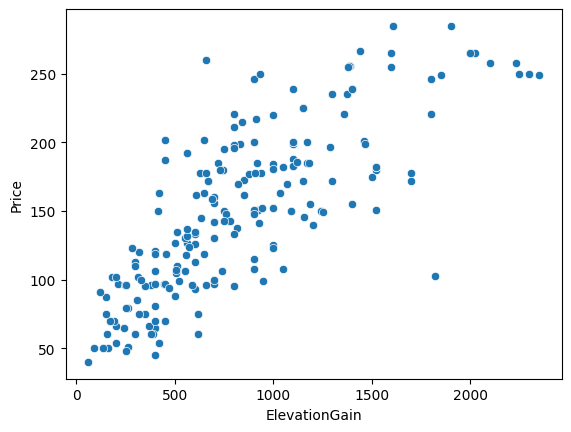

In [48]:
# Syntax with seaborn: sns.scatterplot
sns.scatterplot(data=df_ski, x='ElevationGain', y='Price')

It looks reasonably linear! Let's draw the regression plot:

<Axes: xlabel='ElevationGain', ylabel='Price'>

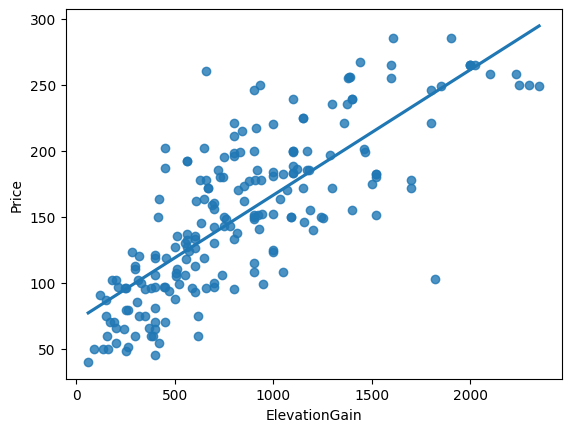

In [49]:
sns.regplot(data=df_ski, x='ElevationGain', y='Price', ci=None)

## Exercise 3: Ski dataset, continued.

1. Produce scatter plots for the pairs (AltitudeTop, Price) and (Slopes, Price). Which relationships look linear?

2. Are these figures easy to read? How to solve this issue?

<font color='red'>Here stops the mandatory part. The rest is optional, depending on the pace of the class.</font>

The last two figures clearly have a problem with *outliers*: one ski station has a number of slopes over 200, whereas the vast majority of the rest of the stations has less than 150 stations. This makes these figures hard to read. We will see in the next class how to solve this issue by dropping the right-most data point. For now, generative AI provides such a solution

<Axes: xlabel='Slopes', ylabel='Price'>

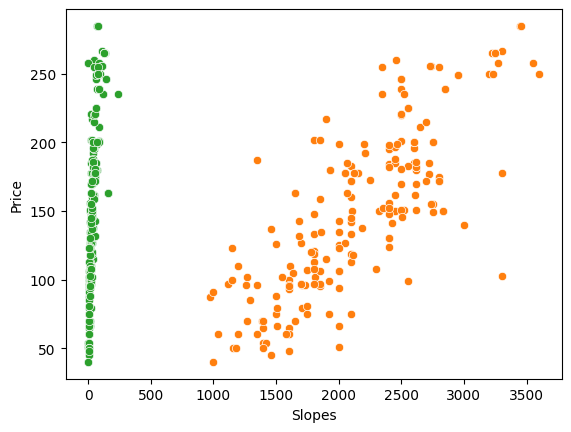

In [57]:
# prompt: scatterplot price by slopes and drop extremal point
sns.scatterplot(data=df_ski[df_ski['Slopes']<200], x='Slopes', y='Price')

sns.scatterplot(data=df_ski,x="AltitudeTop", y=df_ski["Price"]) # pyright: ignore[reportArgumentType]
sns.scatterplot(data=df_ski , x='Slopes', y='Price') # pyright: ignore[reportArgumentType]



But it still does not look linear! Try with a log:

In [ ]:
import numpy as np

In [ ]:
df_ski['LnSlopes'] = np.log(df_ski['Slopes'])
df_ski

In [ ]:
sns.regplot(data=df_ski[df_ski['Slopes']<200], x='LnSlopes', y='Price', ci=None)

# Wrap-up/summary of main commands

We learned how to:
* import important Python packages like pandas and seaborn:

`import pandas as pd`

`import seaborn as sns`


*   load a data set, print the first and last lines, and compute some descriptive statistics for its quantitative variables:

`df = pd.read_csv("link")`

`df.describe()`
*   select and create a variable (a column) in a data frame

`df['variable_name']`

`df['new_var'] = XXX`

*   visualize a quantitative variable using seaborn syntax

`sns.histplot(data = df['variable_name'],bins = 25)`
`sns.boxplot(data = df['variable_name'])`


* visualize two quantitative variables with scatter plots, similarly using seaborn syntax

`sns.scatterplot(data = df, x = 'variable_1', y = 'variable_2')`

# Concluding Comments

- We have focused on the seaborn library, to avoid overloading it with potentially confusing alternatives
- Yet, Python offers many alternative ways of generating a given graph. Gemini will often generate plots using the pandas syntax. A typical example is given next.

- TODO: **Homework 1** for next time (see link on Blackboard)

In [ ]:
# The pandas syntax
df_movie['IMDb'].plot(kind = 'hist')

# Optional readings

* The Netflix prize:

J. Bennett and S. Lanning, *The Netflix Prize*, 2007.

https://www.cs.uic.edu/~liub/KDD-cup-2007/proceedings/The-Netflix-Prize-Bennett.pdf

News article: *The Netflix Prize: How a $1 Million Contest Changed Binge-Watching Forever*, Thrillist, 2017.

https://www.thrillist.com/entertainment/nation/the-netflix-prize

Open access to the data: https://www.kaggle.com/datasets/netflix-inc/netflix-prize-data

* Harvard Business Review, *Data Scientist: The Sexiest Job of the 21st Century*, October 2012

https://hbr.org/2012/10/data-scientist-the-sexiest-job-of-the-21st-century

* Harvard Business Review, *Is Data Scientist Still the Sexiest Job of the 21st Century?*, July 2022

https://hbr.org/2022/07/is-data-scientist-still-the-sexiest-job-of-the-21st-century

* Mickael Lewis, *Moneyball: The Art of Winning an Unfair Game*, W. W. Norton & Company Inc., 2003.

* Cathy O'Neil, *Weapon of Math Destruction*, Crownbooks 2016.

* In case you want to learn a bit more about Google Colab (but you don't have to), you may look at the welcome page https://colab.research.google.com/?hl=fr or https://colab.research.google.com/notebooks/basic_features_overview.ipynb




